<a href="https://colab.research.google.com/github/AndrewNewton13/Learning/blob/main/Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to NLP Funadmentals in TensorFlow

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-d85f92d1-0f8b-116a-b3b4-c800c1869575)


In [ ]:
# Get helper functions
!wget https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/extras/helper_functions.py

--2021-08-02 14:00:53--  https://github.com/mrdbourke/tensorflow-deep-learning/raw/main/extras/helper_functions.py
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py [following]
--2021-08-02 14:00:53--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-08-02 14:00:53 (96.4 MB/s) - ‘helper_func

In [ ]:
# Import series of helper functions for notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

# Getting the Dataset

Get Kaggle NLP dataset



In [ ]:
# Download the dataset
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2021-08-02 14:00:55--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.250.101.128, 142.250.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.005s  

2021-08-02 14:00:55 (121 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
# Unzip the data
unzip_data('nlp_getting_started.zip')

# Visualizing a Text Dataset

Visualize, visualize, visualize

In [ ]:
import pandas as pd
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)

In [ ]:
# what does the test dataframe look like?
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# How many examples of each class are there?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
# Total number of samples
len(train_df), len(test_df)

(7613, 3263)

In [ ]:
# Let's visualize some random training samples
import random
random_index = random.randint(0,len(train_df)-5) # create random indexes
for row in train_df_shuffled[["text","target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 0 (not real disaster)
Text:
We walk the plank of a sinking ship

---

Target: 0 (not real disaster)
Text:
@Zak_Bagans pets r like part of the family. I love animals.??? The last 2 pets I had I rescued! Breaks my heart when animals are mistreated????

---

Target: 0 (not real disaster)
Text:
ON THE USE OF PERFORATED METAL SHEAR PANEL SFOR SEISMIC-RESISTANT APPLICATIONS http://t.co/cX5OjH2Dr4

---

Target: 0 (not real disaster)
Text:
The answer my friend is yelling in the wind-my latest article for http://t.co/LbMeKYphM5.Pls read and share - thanks! http://t.co/9NwAJLi9cr

---

Target: 0 (not real disaster)
Text:
Woman electrocuted #Red #Redblood #videoclip http://t.co/9PYmM2RUWf #

---



# Split Data Into Training and Validation Sets

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
# Use train test split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled['target'].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [ ]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
# Check the first 10 samples
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

# Convert Text into Numbers

Models don't like words, they like numbers.

In [ ]:
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
# Use the default TextVectorization parameters
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (automatically add <00V>)
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None, # create groups of n-words
                                    output_mode="int", # how to map tokens to words
                                    output_sequence_length=50, # how long do you want your sequences to be
                                    pad_to_max_tokens=True # pad with 0s  
                                    )

In [ ]:
# Find the average number of tokens in the training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [ ]:
# Setup text vectorization variables
max_vocab_length = 10000 # max number of words in our vocabulary
max_length = 15 # max length our sequences will be/how many words from a tweet our model sees

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode='int',
                                    output_sequence_length=max_length)

In [ ]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [ ]:
# Create a sample sentence and tokenize it
sample_sentence = "there's a flood in my street"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
\n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
 Pandemonium In Aba As Woman Delivers Baby Without Face (Photos) http://t.co/wRqF6U55hh

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 502,    4, 1157,   26,  410, 1146,  469,  228,  289,  729,    1,
           0,    0,    0,    0]])>

In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary() # get all of the unique words in our training data
top_5_words = words_in_vocab[:5] # get the most 5 common words
bottom_5_words = words_in_vocab[-5:] # get the least 5 common words
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Most common words: {top_5_words}")
print(f"Least common words: {bottom_5_words}")

Number of words in vocab: 10000
Most common words: ['', '[UNK]', 'the', 'a', 'in']
Least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


# Creating an Embedding Layer

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             input_length=max_length)
embedding

In [ ]:
# Get a random sentence
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
\n\nEmbedded version:")

# Embed the random sentence (turn positive integers into dense vectors of fixed size)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
 @nuggets #FETTILOOTCH IS #SLANGLUCCI OPPRESSIONS GREATEST DANGER COMING SOON THE ALBUM 
https://t.co/moLL5vd8yD

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.00698618,  0.0365108 ,  0.04417353, ..., -0.04073453,
         -0.00276176, -0.02843927],
        [ 0.02777245, -0.02022661,  0.04938425, ..., -0.03861214,
          0.0045853 ,  0.04564835],
        [ 0.04065524,  0.03276226,  0.01760873, ...,  0.0222453 ,
          0.01231786, -0.04059511],
        ...,
        [ 0.04451367,  0.03127616, -0.03154935, ...,  0.00902586,
         -0.03127798, -0.00535891],
        [ 0.04451367,  0.03127616, -0.03154935, ...,  0.00902586,
         -0.03127798, -0.00535891],
        [ 0.04451367,  0.03127616, -0.03154935, ...,  0.00902586,
         -0.03127798, -0.00535891]]], dtype=float32)>

In [ ]:
# Check out a sigle token's embedding
sample_embed[0][0], sample_embed[0][0].shape, random_sentence[0]

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-0.00698618,  0.0365108 ,  0.04417353, -0.04624617,  0.02750218,
         0.02791592,  0.03263079,  0.04091332,  0.03733362, -0.03380834,
         0.03359528, -0.0245878 , -0.01912527, -0.01275373, -0.00585026,
        -0.04448568,  0.02613641,  0.01420064, -0.02636045, -0.04603962,
        -0.03988938, -0.00078498,  0.02124057, -0.01608895,  0.04551783,
         0.03513447, -0.03498001, -0.02366414, -0.03927336,  0.04608181,
         0.00675166, -0.01391878, -0.03165009,  0.04159469,  0.01373844,
         0.01975587,  0.01552521,  0.01734496,  0.00557522, -0.00138186,
         0.01044982, -0.02644907, -0.02604102, -0.01043921,  0.01420405,
        -0.0224874 , -0.00647827,  0.00362867,  0.0300725 , -0.03339206,
        -0.02586372,  0.01088081,  0.04634395, -0.02911819,  0.02931705,
         0.03308945,  0.02476833, -0.00609992, -0.01170794, -0.03618569,
         0.003681  ,  0.04097647, -0.0055182 , -0.03015654, -0.01939771,
  

# Baseline Model - Naive Bayes

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modeling pipeline
model_0 = Pipeline([
                    ("tfidf",TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf",MultinomialNB()) # model the text

])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
# Evaluate our baseline model
baseline_score = model_0.score(val_sentences,val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [ ]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
from sklearn.metrics import classification_report
baseline_results = classification_report(val_labels,baseline_preds)
print(classification_report(val_labels,baseline_preds))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       414
           1       0.89      0.63      0.73       348

    accuracy                           0.79       762
   macro avg       0.82      0.78      0.78       762
weighted avg       0.81      0.79      0.79       762



In [ ]:
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(val_labels,baseline_preds))

(array([0.74806202, 0.88617886]), array([0.93236715, 0.62643678]), array([0.83010753, 0.73400673]), array([414, 348]))


# Model 1 - A Simple Dense Model

In [ ]:
# Create a tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create a directory to save tensorboard logs
SAVE_DIR = "model_logs"

In [ ]:
# Build model with the functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string) # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn input text into numbers
x = embedding(x) # create an embedding of the numberized inputs
x = layers.GlobalAveragePooling1D()(x) # condense the feature vector for each token to one vector
outputs = layers.Dense(1, activation='sigmoid')(x) # create output layer, binary outputs
model_1 = tf.keras.Model(inputs,outputs,name="model_1_dense")

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile model_1
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

In [ ]:
# Fit model_1 
model_1_history = model_1.fit(train_sentences,train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='model_1_dense')])

Saving TensorBoard log files to: model_logs/model_1_dense/20210802-140104
Epoch 1/5
215/215 [==============================] - 7s 18ms/step - loss: 0.6094 - accuracy: 0.7003 - val_loss: 0.5387 - val_accuracy: 0.7493
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.4401 - accuracy: 0.8167 - val_loss: 0.4707 - val_accuracy: 0.7887
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3460 - accuracy: 0.8602 - val_loss: 0.4589 - val_accuracy: 0.7874
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.2829 - accuracy: 0.8905 - val_loss: 0.4613 - val_accuracy: 0.7913
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.2363 - accuracy: 0.9142 - val_loss: 0.4803 - val_accuracy: 0.7874


In [ ]:
# Check the results
model_1.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4803 - accuracy: 0.7874


[0.48029324412345886, 0.787401556968689]

In [ ]:
# Make some predictions and evaluate those
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10]

array([[0.36604792],
       [0.7190115 ],
       [0.9976572 ],
       [0.10993525],
       [0.1051427 ],
       [0.9424389 ],
       [0.92217547],
       [0.99217916],
       [0.966624  ],
       [0.24869096]], dtype=float32)

In [ ]:
# Convert the prediction probabilities into label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model 1 results
model_1_results = classification_report(val_labels,model_1_preds)
print(classification_report(val_labels,model_1_preds))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       414
           1       0.83      0.68      0.74       348

    accuracy                           0.79       762
   macro avg       0.80      0.78      0.78       762
weighted avg       0.79      0.79      0.78       762



In [ ]:
print(baseline_results)

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       414
           1       0.89      0.63      0.73       348

    accuracy                           0.79       762
   macro avg       0.82      0.78      0.78       762
weighted avg       0.81      0.79      0.79       762



# Visualizing Learned Embeddings

In [ ]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
# Model 1 summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Get the weight matrix of embedding layer
# These are the numerical representations of each token in our training data, which have been learned for 5 epochs
embed_weights = model_1.get_layer("embedding").get_weights()[0]
embed_weights

array([[ 0.05520296,  0.02037858, -0.04327086, ..., -0.0003922 ,
        -0.02446394,  0.00508966],
       [ 0.04573279,  0.00377521,  0.00730899, ..., -0.04583199,
         0.02332764, -0.01755452],
       [-0.00666384, -0.01769004, -0.0324298 , ..., -0.03334329,
        -0.0241269 , -0.00329707],
       ...,
       [ 0.04506094,  0.04716535,  0.04138646, ..., -0.0214006 ,
        -0.01948127,  0.01978376],
       [ 0.03216965, -0.02161333, -0.04416534, ..., -0.07389495,
         0.04289224,  0.02201922],
       [ 0.05414815, -0.05472768, -0.09555051, ..., -0.09549597,
         0.02194124,  0.09247295]], dtype=float32)

In [ ]:
# Check the shape of embed weights
embed_weights.shape

(10000, 128)

In [ ]:
# Create embedding files (got this from tensorflow word embeddgins documentation)
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [ ]:
# Download files from Colab to upload to projector
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Model 2 - LSTM

LSTM means long short term memory (one of the most popular cells)

RNN structure:

'''
Input (text) -> Tokenize -> Embedding -> Layers (RNNs/dense) -> Output(label probability)

In [ ]:
# Create an LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
#print(x.shape)
#x = layers.LSTM(64, return_sequences=True)(x) # when you're stacking RNN cells together you need to set return_sequences=True
#print(x.shape)
x = layers.LSTM(64)(x)
#print(x.shape)
#x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_2 = tf.keras.Model(inputs,outputs,name="model_2_LSTM")

In [ ]:
# Get a summary
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile LSTM model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

In [ ]:
# Fit LSTM model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='model_2_LSTM')])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20210802-140127
Epoch 1/5
215/215 [==============================] - 10s 22ms/step - loss: 0.2267 - accuracy: 0.9188 - val_loss: 0.5670 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.1562 - accuracy: 0.9426 - val_loss: 0.5774 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 4s 18ms/step - loss: 0.1281 - accuracy: 0.9514 - val_loss: 0.7610 - val_accuracy: 0.7822
Epoch 4/5
215/215 [==============================] - 4s 17ms/step - loss: 0.1076 - accuracy: 0.9581 - val_loss: 0.9282 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0852 - accuracy: 0.9667 - val_loss: 0.8918 - val_accuracy: 0.7835


In [ ]:
# Make predictions with LSTM model
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

array([[9.7539909e-02],
       [5.4577595e-01],
       [9.9951708e-01],
       [1.0955870e-01],
       [5.0001120e-04],
       [9.9648935e-01],
       [7.8150606e-01],
       [9.9952435e-01],
       [9.9938607e-01],
       [7.2731787e-01]], dtype=float32)

In [ ]:
# Convert model 2 pred probs to labels 
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Model 2 results 
model_2_results = classification_report(val_labels,model_2_preds)
print(model_2_results)

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       414
           1       0.79      0.72      0.75       348

    accuracy                           0.78       762
   macro avg       0.78      0.78      0.78       762
weighted avg       0.78      0.78      0.78       762



# Model 3 - GRU

Gated recurrent unit

In [ ]:
# Build a RNN using GRU cell
from tensorflow.keras import layers
input = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64)(x)
# x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model_3 = tf.keras.Model(inputs,outputs,name='model_3_GRU')

In [ ]:
# Model 3 summary
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
gru (GRU)                    (None, 64)                37248     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 1,321,473
Trainable params: 1,321,473
Non-trainable params: 0
_____________________________________________

In [ ]:
# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

In [ ]:
# Fit the model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     'model_3_GRU')])

Saving TensorBoard log files to: model_logs/model_3_GRU/20210802-140153
Epoch 1/5
215/215 [==============================] - 6s 22ms/step - loss: 0.1504 - accuracy: 0.9451 - val_loss: 0.7351 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.0825 - accuracy: 0.9682 - val_loss: 0.7694 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 4s 16ms/step - loss: 0.0682 - accuracy: 0.9743 - val_loss: 0.9998 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 3s 16ms/step - loss: 0.0597 - accuracy: 0.9753 - val_loss: 1.3047 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 3s 16ms/step - loss: 0.0526 - accuracy: 0.9769 - val_loss: 1.3854 - val_accuracy: 0.7769


In [ ]:
# Make some predictions with GRU model
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

array([[1.1751665e-03],
       [6.9717538e-01],
       [9.9998808e-01],
       [1.0020026e-01],
       [4.8015463e-06],
       [9.9966800e-01],
       [1.2013673e-01],
       [9.9999273e-01],
       [9.9997830e-01],
       [4.3648472e-01]], dtype=float32)

In [ ]:
# Convert pred probs to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 0., 1., 1., 0.], dtype=float32)>

In [ ]:
# Create classification report
model_3_results = classification_report(val_labels,model_3_preds)
print(model_3_results)

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       414
           1       0.82      0.66      0.73       348

    accuracy                           0.78       762
   macro avg       0.79      0.77      0.77       762
weighted avg       0.78      0.78      0.77       762



# Model 4 - Bidirectional

In [ ]:
# Build a bidirectional RNN
inputs = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
x = layers.Dense(64,activation='relu')(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model_4 = tf.keras.Model(inputs,outputs,name='model_4')

In [ ]:
# Model 4 summary
model_4.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               98816     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 1,387,137
Trainable params: 1,387,137
Non-trainable params: 0
_________________________________________________

In [ ]:
# Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

In [ ]:
# Fit the model
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     'model_4_bidirectional')])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20210802-140217
Epoch 1/5
215/215 [==============================] - 8s 24ms/step - loss: 0.1079 - accuracy: 0.9685 - val_loss: 1.0115 - val_accuracy: 0.7651
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0510 - accuracy: 0.9777 - val_loss: 1.2153 - val_accuracy: 0.7769
Epoch 3/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0450 - accuracy: 0.9778 - val_loss: 1.5663 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0502 - accuracy: 0.9768 - val_loss: 1.1796 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0388 - accuracy: 0.9806 - val_loss: 1.7873 - val_accuracy: 0.7756


In [ ]:
# Make predictions
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

array([[3.8741503e-04],
       [8.1032401e-01],
       [9.9999964e-01],
       [2.8719366e-01],
       [3.1810953e-07],
       [9.9999881e-01],
       [2.8706104e-01],
       [1.0000000e+00],
       [9.9999940e-01],
       [9.9902534e-01]], dtype=float32)

In [ ]:
# Convert pred probs to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 0., 1., 1., 1.], dtype=float32)>

In [ ]:
# Make classification report
model_4_results = classification_report(val_labels,model_4_preds)
print(model_4_results)

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       414
           1       0.79      0.69      0.74       348

    accuracy                           0.78       762
   macro avg       0.78      0.77      0.77       762
weighted avg       0.78      0.78      0.77       762



# Model 5 - 1D Convolutional Neural Network for Text

In [ ]:
# Build a 1D Conv neural network for text
inputs = layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64,kernel_size=3,activation='relu')(x)
x = layers.GlobalMaxPool1D()(x)
x = layers.Dense(64,activation='relu')(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model_5 = tf.keras.Model(inputs,outputs,name="model_5")

In [ ]:
# Model 5 summary
model_5.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 13, 64)            24640     
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65  

In [ ]:
# Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

In [ ]:
# Fit model 5 
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     'model_5_conv_1d')])

Saving TensorBoard log files to: model_logs/model_5_conv_1d/20210802-140302
Epoch 1/5
215/215 [==============================] - 31s 21ms/step - loss: 0.1431 - accuracy: 0.9545 - val_loss: 0.8352 - val_accuracy: 0.7677
Epoch 2/5
215/215 [==============================] - 3s 16ms/step - loss: 0.0817 - accuracy: 0.9679 - val_loss: 0.9625 - val_accuracy: 0.7625
Epoch 3/5
215/215 [==============================] - 4s 16ms/step - loss: 0.0624 - accuracy: 0.9749 - val_loss: 1.0959 - val_accuracy: 0.7572
Epoch 4/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0503 - accuracy: 0.9787 - val_loss: 1.2152 - val_accuracy: 0.7651
Epoch 5/5
215/215 [==============================] - 3s 16ms/step - loss: 0.0441 - accuracy: 0.9799 - val_loss: 1.2489 - val_accuracy: 0.7585


In [ ]:
# Make predictions 
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

array([[5.9831444e-02],
       [6.3057148e-01],
       [9.9985635e-01],
       [5.3393073e-02],
       [4.4089729e-06],
       [9.9972767e-01],
       [9.6760899e-01],
       [9.9964941e-01],
       [9.9999642e-01],
       [9.7397059e-01]], dtype=float32)

In [ ]:
# Convert pred probs to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Make classification report
model_5_results = classification_report(val_labels,model_5_preds)
print(model_5_results)

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       414
           1       0.77      0.67      0.72       348

    accuracy                           0.76       762
   macro avg       0.76      0.75      0.75       762
weighted avg       0.76      0.76      0.76       762



In [ ]:
print(baseline_results)

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       414
           1       0.89      0.63      0.73       348

    accuracy                           0.79       762
   macro avg       0.82      0.78      0.78       762
weighted avg       0.81      0.79      0.79       762



# Model 6 - Pretrained Feature Extractor



In [ ]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence])
print(embed_samples[0][:50]), embed_samples.shape

tf.Tensor(
[-0.01157024  0.02485911  0.02878048 -0.01271502  0.0397154   0.08827759
  0.02680984  0.05589837 -0.01068729 -0.00597293  0.00639323 -0.01819519
  0.00030816  0.09105889  0.05874645 -0.03180628  0.01512473 -0.05162928
  0.00991364 -0.06865346 -0.04209306  0.02678978  0.03011007  0.00321067
 -0.00337968 -0.04787357  0.02266722 -0.00985927 -0.04063614 -0.01292094
 -0.04666385  0.056303   -0.03949257  0.00517688  0.02495825 -0.07014439
  0.02871507  0.04947682 -0.00633977 -0.08960193  0.02807119 -0.00808361
 -0.01360602  0.05998649 -0.10361786 -0.05195374  0.00232955 -0.02332531
 -0.03758105  0.0332773 ], shape=(50,), dtype=float32)


(None, TensorShape([1, 512]))

In [ ]:
# Create keras layer using pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        trainable=False,
                                        dtype=tf.string,
                                        name='USE')

In [ ]:
# Create model using Sequential API
model_6 = tf.keras.Sequential([
                               sentence_encoder_layer,
                               layers.Dense(64,activation='relu'),
                               layers.Dense(1,activation='sigmoid',name='output_layer')
], name='model_6_USE')

In [ ]:
# Compile model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

In [ ]:
# Check model summary
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_8 (Dense)              (None, 64)                32832     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Train a classifier on top of USE pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     'model_6_USE')])

Saving TensorBoard log files to: model_logs/model_6_USE/20210802-140445
Epoch 1/5
215/215 [==============================] - 7s 25ms/step - loss: 0.5083 - accuracy: 0.7827 - val_loss: 0.4463 - val_accuracy: 0.7979
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4139 - accuracy: 0.8164 - val_loss: 0.4437 - val_accuracy: 0.8071
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.4015 - accuracy: 0.8222 - val_loss: 0.4316 - val_accuracy: 0.8176
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3927 - accuracy: 0.8270 - val_loss: 0.4269 - val_accuracy: 0.8150
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3852 - accuracy: 0.8298 - val_loss: 0.4284 - val_accuracy: 0.8123


In [ ]:
# Make pred probs
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

array([[0.16474931],
       [0.7591822 ],
       [0.9887643 ],
       [0.19757292],
       [0.70069414],
       [0.6976702 ],
       [0.98347545],
       [0.97658074],
       [0.9360229 ],
       [0.07946248]], dtype=float32)

In [ ]:
# Convert pred probs to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Make classification report
model_6_results = classification_report(val_labels,model_6_preds)
print(model_6_results)

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       414
           1       0.85      0.72      0.78       348

    accuracy                           0.81       762
   macro avg       0.82      0.81      0.81       762
weighted avg       0.82      0.81      0.81       762



In [ ]:
print(baseline_results)

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       414
           1       0.89      0.63      0.73       348

    accuracy                           0.79       762
   macro avg       0.82      0.78      0.78       762
weighted avg       0.81      0.79      0.79       762



# Model 7 - 10% Data with Pretrained Feature Extractor

Replicate model 6 but train on only 10% of the data.

In [ ]:
# Create subsets of 10% data
train_10_percent_split = int(0.1 *len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]
len(train_sentences_10_percent), len(train_labels_10_percent)

(685, 685)

In [ ]:
# Let's build a model the same as model_6 using tf.keras.clone_model
model_7 = tf.keras.models.clone_model(model_6)

# Compile model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_8 (Dense)              (None, 64)                32832     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Fit the model to the 10% training data
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     'model_7_10_percent_correct')])

Saving TensorBoard log files to: model_logs/model_7_10_percent_correct/20210802-140506
Epoch 1/5
22/22 [==============================] - 4s 117ms/step - loss: 0.6612 - accuracy: 0.6978 - val_loss: 0.6401 - val_accuracy: 0.7165
Epoch 2/5
22/22 [==============================] - 0s 19ms/step - loss: 0.5887 - accuracy: 0.7854 - val_loss: 0.5865 - val_accuracy: 0.7598
Epoch 3/5
22/22 [==============================] - 1s 24ms/step - loss: 0.5187 - accuracy: 0.8073 - val_loss: 0.5331 - val_accuracy: 0.7743
Epoch 4/5
22/22 [==============================] - 0s 19ms/step - loss: 0.4594 - accuracy: 0.8204 - val_loss: 0.5055 - val_accuracy: 0.7743
Epoch 5/5
22/22 [==============================] - 0s 19ms/step - loss: 0.4185 - accuracy: 0.8394 - val_loss: 0.4901 - val_accuracy: 0.7808


In [ ]:
# Make predictions 
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

array([[0.24908693],
       [0.6004918 ],
       [0.905458  ],
       [0.39113522],
       [0.57439494],
       [0.69722426],
       [0.8768455 ],
       [0.7868826 ],
       [0.8594954 ],
       [0.15206312]], dtype=float32)

In [ ]:
# Convert pred probs to labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Make classification report
model_7_results = classification_report(val_labels,model_7_preds)
print(model_7_results)

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       414
           1       0.79      0.71      0.75       348

    accuracy                           0.78       762
   macro avg       0.78      0.78      0.78       762
weighted avg       0.78      0.78      0.78       762



In [ ]:
print(model_6_results)

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       414
           1       0.85      0.72      0.78       348

    accuracy                           0.81       762
   macro avg       0.82      0.81      0.81       762
weighted avg       0.82      0.81      0.81       762



In [ ]:
print(baseline_results)

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       414
           1       0.89      0.63      0.73       348

    accuracy                           0.79       762
   macro avg       0.82      0.78      0.78       762
weighted avg       0.81      0.79      0.79       762



# Comparing the Performances 

# Uploading our model training logs to tensboard.dev
!tensorboard dev upload --logdir ./model_logs/ \
  --name 'Comparing NLP Model Results' \
  --description 'Comparing multiple different types of model architectures on the Kaggle Tweets text classification dataset.' \
  --one_shot

# Saving and Loading a Trained Model

Two main formats for saving a model:
1. The HDF5 format
2. The 'SavedModel' format (default when using TensorFlow)

In [ ]:
# Save model 6 to hdf5 format
model_6.save('model_6.h5')

In [ ]:
import tensorflow_hub as hub

In [ ]:
# Load model with custom Hub Layer (required with HDF5 format)
loaded_model_6 = tf.keras.models.load_model('model_6.h5', 
                                            custom_objects={"KerasLayer": hub.KerasLayer})

In [ ]:
# How does our loaded model perform?
loaded_model_6.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 9ms/step - loss: 0.4284 - accuracy: 0.8123


[0.42842137813568115, 0.8123359680175781]

In [ ]:
print(model_6_results)

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       414
           1       0.85      0.72      0.78       348

    accuracy                           0.81       762
   macro avg       0.82      0.81      0.81       762
weighted avg       0.82      0.81      0.81       762



In [ ]:
# Save model 6 to SavedModel format
model_6.save("model_6_SavedModel_format")

INFO:tensorflow:Assets written to: model_6_SavedModel_format/assets


INFO:tensorflow:Assets written to: model_6_SavedModel_format/assets


In [ ]:
# Load in a model from SavedModel format
loaded_model_6_SavedModel_format = tf.keras.models.load_model('model_6_SavedModel_format')

In [ ]:
# Evaluate the loaded model
loaded_model_6_SavedModel_format.evaluate(val_sentences,val_labels) 

24/24 [==============================] - 1s 10ms/step - loss: 0.4284 - accuracy: 0.8123


[0.42842137813568115, 0.8123359680175781]

# Finding the Most Wrong Predictions
Which predictions were very confident but still wrong?

In [ ]:
# Download a pretrained model from google storage
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip

--2021-08-02 14:05:42--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 74.125.137.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  34.2MB/s    in 16s     

2021-08-02 14:05:58 (56.2 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables.

In [ ]:
# Import previsouly trained model from google storage
model_6_pretrained = tf.keras.models.load_model('08_model_6_USE_feature_extractor')
model_6_pretrained.evaluate(val_sentences,val_labels)

24/24 [==============================] - 1s 9ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723122239112854, 0.8162729740142822]

In [ ]:
# Make predictions with the loaded model
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Create a DataFrame with validation sentences & labels and best performing model predictions
val_df = pd.DataFrame({'text':val_sentences,'target':val_labels,
                       'pred':model_6_pretrained_preds,
                       'pred_prob':tf.squeeze(model_6_pretrained_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [ ]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df['target']!=val_df['pred']].sort_values('pred_prob',ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


In [ ]:
most_wrong[:-10]

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
...,...,...,...,...
486,VICTORINOX SWISS ARMY DATE WOMEN'S RUBBER MOP ...,1,0.0,0.080426
361,Next May I'll be free...from school from oblig...,1,0.0,0.078982
40,@BoyInAHorsemask its a panda trapped in a dogs...,1,0.0,0.071388
352,@reriellechan HE WAS THE LICH KING'S FIRST CAS...,1,0.0,0.071257


In [ ]:
# Check the false positives (model predicted 1 ehn should've been 0)
for row in most_wrong[:10].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0, Pred: 1.0, Prob: 0.9101957678794861
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1.0, Prob: 0.8769821524620056
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1.0, Prob: 0.8523000478744507
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1.0, Prob: 0.8354544639587402
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, Pred: 1.0, Prob: 0.8272132277488708
Text:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

----

Target: 0, Pred: 1.0, Prob: 0.8148158192634583
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

---

In [ ]:
# Check the false negatives (model predicted 1 ehn should've been 0)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1, Pred: 0.0, Prob: 0.06730346381664276
Text:
@DavidVonderhaar At least you were sincere ??

----

Target: 1, Pred: 0.0, Prob: 0.055075809359550476
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0.0, Prob: 0.05460338667035103
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1, Pred: 0.0, Prob: 0.054597001522779465
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----

Target: 1, Pred: 0.0, Prob: 0.049637261778116226
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0.0, Prob: 0.043918490409851074
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

----

Target: 1, Pred: 0.0, Prob: 

# Make Predictions on the Test Data

In [ ]:
# Making predictions on test dataset and visualizing them
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences,10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample]))
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print('----\n')

Pred: 0, Prob: 0.11581898480653763
Text:
@KDonhoops Sure! Meek Mill accused Drake of not writing his own raps. Drake responds w/ obliteration of Meek's career. #OldFolkExplainStuff

----

Pred: 1, Prob: 0.9585182666778564
Text:
Protesters mark year since fatal police shooting in Wal-Mart (from @AP) http://t.co/3KbeJGmj0d

----

Pred: 0, Prob: 0.4263988137245178
Text:
.@ArneJungjohann #Energiewende is directly responsible for the collapse in energy value. http://t.co/NxvjPj610W

----

Pred: 1, Prob: 0.8669036626815796
Text:
RT Saginaw - Police sketches of 2 'persons of interest' in Saginaw arson http://t.co/a2tZJ07nId http://t.co/LvtP5MHjaG

----

Pred: 0, Prob: 0.06657341867685318
Text:
I'm just not a relationship person. That's why when I have a crush on someone I always think they're not going to feel the same way

----

Pred: 1, Prob: 0.9721087217330933
Text:
[The Guardian] Islamic State claims suicide bombing at Saudi Arabian mosque http://t.co/tqvPUSaFJQ

----

Pred: 0, Prob: 0.03

In [ ]:
# Predict on a random tweet
sample_tweet = 'I think it’s time to hit the gas station and get a monster.'
sample_prediction = model_6_pretrained.predict([sample_tweet])
sample_prediction

array([[0.08432701]], dtype=float32)

In [ ]:
sample_tweet_2 = 'We have confirmed an 8th tornado from the July 29th event. This one occurred in Slatington,PA (Lehigh County) and is rated an EF0 with peak winds up to 85 mph. More details later. #pawx'
sample_2_prediction = model_6_pretrained.predict([sample_tweet_2])
sample_2_prediction

array([[0.9464545]], dtype=float32)

# The Speed/Score Tradeoff

In [ ]:
# Let's make a function to measure the time of prediction
import time
def pred_timer(model,samples):
  """
  Times how long a model takes to make predictions on samples.
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples) # make predictions
  end_time = time.perf_counter() # get finish time
  total_time = end_time - start_time # calculate how long predictions took to make
  time_per_pred = total_time/len(samples)
  return total_time, time_per_pred

In [ ]:
# Calculate time per pred for transfer learning model on a GPU
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6_pretrained, val_sentences)

model_6_total_pred_time, model_6_time_per_pred

(0.22698233299996673, 0.00029787707742777783)

In [ ]:
# Calculate our baseline model times per pred on a GPU
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)

baseline_total_pred_time, baseline_time_per_pred

(0.018842520000021068, 2.4727716535460718e-05)

In [ ]:
# Convert baseline results into a DataFrame
baseline_results_dict = classification_report(val_labels,baseline_preds,output_dict=True)
baseline_results_df = pd.DataFrame(baseline_results_dict).transpose()
baseline_results_df.head()

,precision,recall,f1-score,support
0,0.748062,0.932367,0.830108,414.000000
1,0.886179,0.626437,0.734007,348.000000
accuracy,0.792651,0.792651,0.792651,0.792651
macro avg,0.817120,0.779402,0.782057,762.000000
weighted avg,0.811139,0.792651,0.786219,762.000000


ValueError: ignored

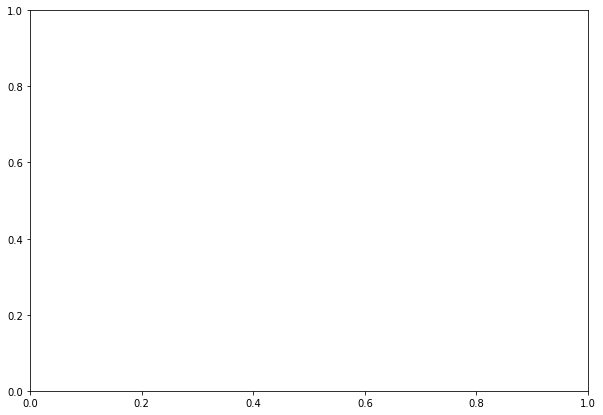

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.scatter(baseline_time_per_pred,baseline_results_df['f1-score'],label='baseline')